# IMPORTING MODULES

In [4]:
import brainsurf.data.csv as csv_import
file_path = '/Users/raspras/Desktop/capstone/brainsurf/brainsurf/data/samples/mantra_meditation/sample_data.csv'
eeg_data = csv_import.convert_csv_to_eegdata(file_path)
data_summary = eeg_data.summary(300)
keys = eeg_data.keys()
print(keys)

       sec       raw     alpha      beta     theta     delta
0    2.440  -9.51538 -0.458429 -0.300244  0.938709  -8.22506
1    2.445  -8.83179 -0.477408 -0.096552  0.806110  -7.79171
2    2.450  -7.40356 -0.456316  0.177482  0.663650  -7.35087
3    2.455  -7.04956 -0.390345  0.317293  0.517710  -6.90547
4    2.460  -7.83081 -0.279366  0.224235  0.374589  -6.45845
..     ...       ...       ...       ...       ...       ...
295  3.915 -41.81520  0.205750 -0.491268  0.530245 -40.67800
296  3.920 -41.77250  0.303030 -0.190015  0.783263 -41.31950
297  3.925 -41.87620  0.343575  0.251658  1.006750 -41.90790
298  3.930 -41.27810  0.325660  0.626389  1.198040 -42.44410
299  3.935 -41.03390  0.256837  0.740745  1.355360 -42.92900

[300 rows x 6 columns]
Index(['sec', 'raw', 'alpha', 'beta', 'theta', 'delta'], dtype='object')


# Graphs

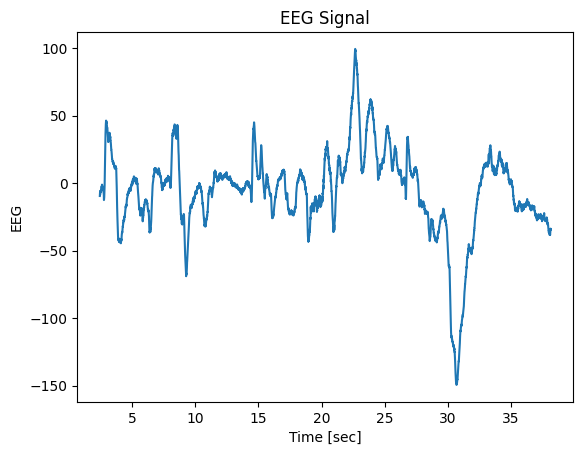

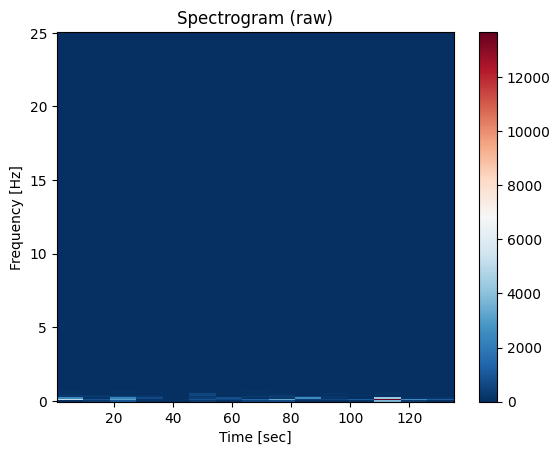

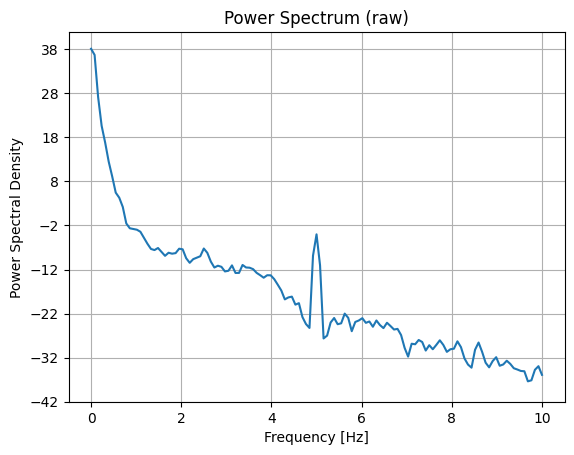

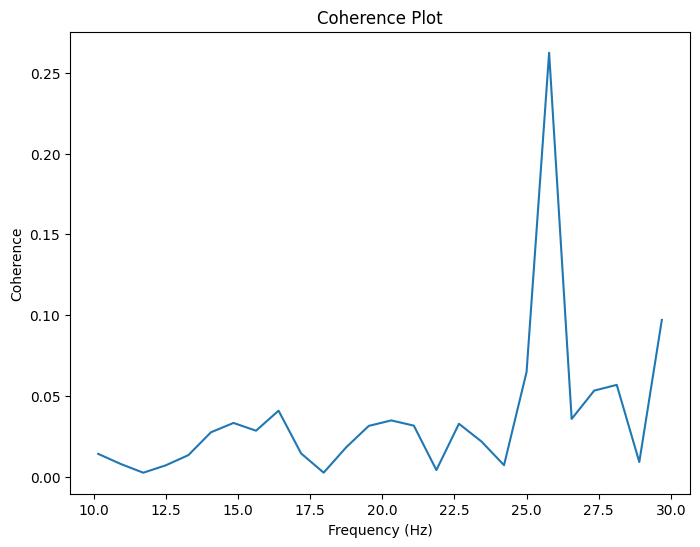

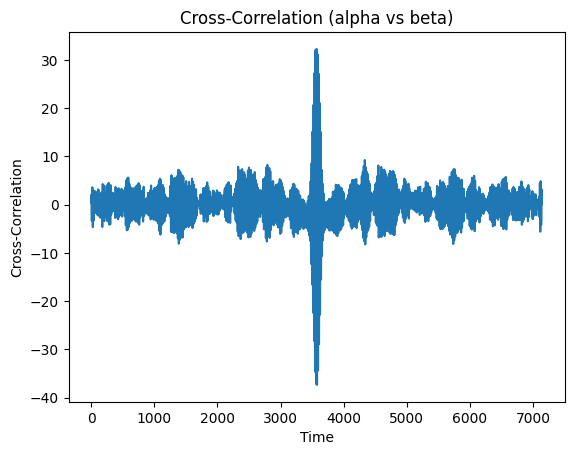

In [5]:
import brainsurf.data.eeg_data_visualization as visual
factory = visual.EEGVisualizationFactory(eeg_data)
# factory.plot_eeg_signal()
# factory.plot_spectrogram('alpha')
# factory.plot_power_spectrum('theta')
# factory.plot_coherence('alpha', 'beta')
# factory.plot_cross_correlation('delta', 'beta')
# factory.plot_heatmap()

factory.plot_eeg_signal()
factory.plot_spectrogram(channel='raw', fs= 50, window='hamming', nperseg=512)
factory.plot_power_spectrum(channel='raw', fs=20, x_label='Frequency [Hz]')
factory.plot_coherence(channel1='alpha', channel2='theta', freq_range=(10, 30))
factory.plot_cross_correlation(channel1='alpha', channel2='beta')

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = data.drop("sec", axis=1)
corr = data.corr()
sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.xlabel("Frequency Band")
plt.ylabel("Frequency Band")
plt.show()

NameError: name 'data' is not defined

In [ ]:
# Line plot: A line plot can be used to visualize the amplitude of each frequency band over time.
#  This can help to identify any patterns or trends in the data.
import matplotlib.pyplot as plt

plt.plot(data['sec'], data['alpha'], label='Alpha')
plt.plot(data['sec'], data['beta'], label='Beta')
plt.plot(data['sec'], data['delta'], label='Delta')
plt.plot(data['sec'], data['theta'], label='Theta')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


NameError: name 'data' is not defined

Box plot: A box plot can be used to compare the distribution of amplitudes across the different frequency bands. This can help to identify any differences or similarities between the frequency bands.

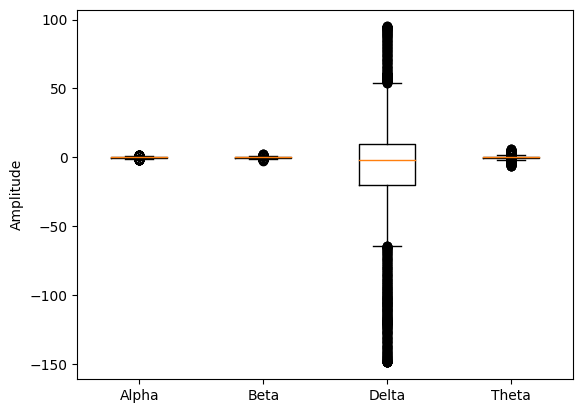

In [ ]:
data = [data['alpha'], data['beta'], data['delta'], data['theta']]
plt.boxplot(data, labels=['Alpha', 'Beta', 'Delta', 'Theta'])
plt.ylabel('Amplitude')
plt.show()

In [ ]:
#Filter using Notch filter
# notch_filtered_data = filter.notch_filter(ud.get_columns(data, ['EEG']).to_numpy().T, sampling_freq, 50, q)
# notch_filtered_data=notch_filtered_data.ravel()
# plot_eeg.plot_eeg_signal(time, notch_filtered_data, 'Notch Filtered EEG Signal(1-50Hz)','Time(sec)','Amplitude(micro Volts)')

In [ ]:
# calculate relative power of alpha, beta, and theta bands
delta_power, theta_power , alpha_power, beta_power= stats.calculate_relative_power(freqs, psd)

In [ ]:
# print('Relative Power - Alpha: ', alpha_power)
# print('Relative Power - Beta: ', beta_power)
# print('Relative Power - Theta: ', theta_power)
# print('Relative Power - Delta: ', delta_power)

In [ ]:
notch_filtered_data

array([ -9.27256923,  -8.60642289,  -7.68786764, ..., -34.08919772,
       -34.62875288, -34.63432755])

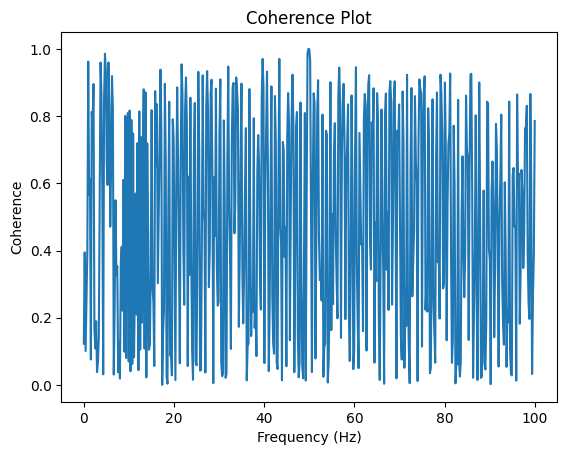

In [ ]:
coherence, freqs =  stats.calculate_coherence(data['alpha'].to_numpy().T , data['theta'].to_numpy().T, sampling_freq )
# print('Coherence - Alpha/Theta: ', coherence)
plot_eeg.plot_eeg_signal(coherence, freqs, 'Coherence Plot','Frequency (Hz)','Coherence')

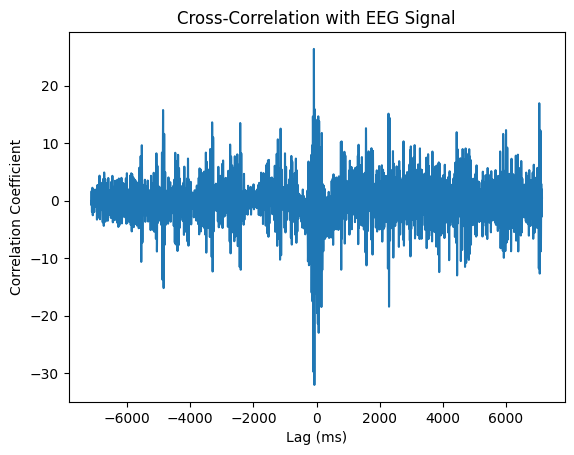

In [ ]:
# calculate coherence between alpha and theta bands
lags, xcorr_alpha = stats.calculate_cross_correlation(data['alpha'].to_numpy().T , data['theta'].to_numpy().T)
_, xcorr_beta = stats.calculate_cross_correlation(data['alpha'].to_numpy().T , data['theta'].to_numpy().T)
import matplotlib.pyplot as plt
# plot the cross-correlation functions
# plt.plot(lags, xcorr_alpha, label='Alpha')
# plt.plot(lags, xcorr_beta, label='Beta')
plot_eeg.plot_eeg_signal(xcorr_alpha,lags, 'Cross-Correlation with EEG Signal','Lag (ms)','Correlation Coefficient')

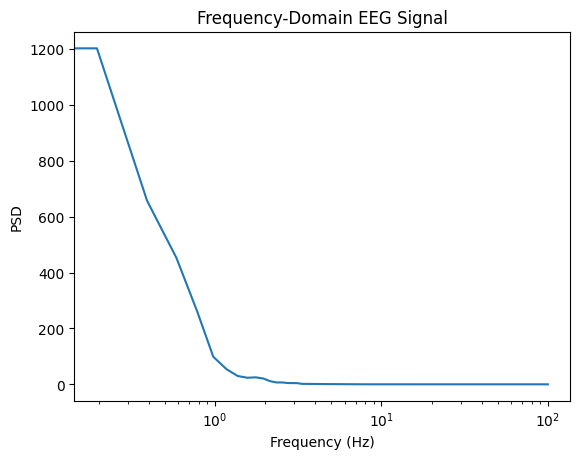

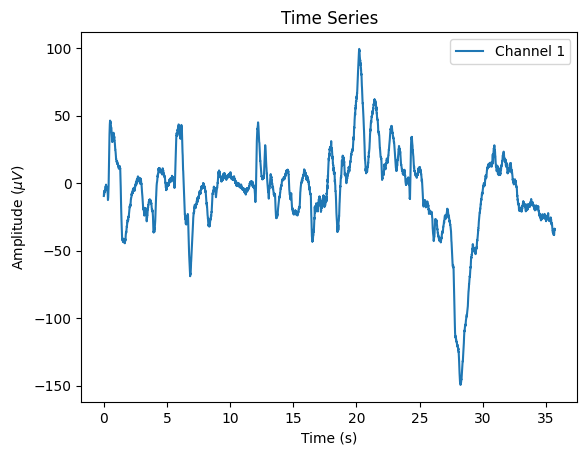

In [ ]:
ps.welch_power_spectrum(data,200)
ts.plot_time_series(ud.get_columns(data, ['EEG']).to_numpy().T, sampling_freq)
